In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../src_jobs/')

In [2]:
import pickle
from itertools import repeat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from detector import WindowTransformerDetector

In [3]:
"""
returns: list of list of arrays containing the time series in the datasets in names
    only adds the series that are longer than the provided width (1024)
returns: weights for the time series in the list according to number of time series in the dataset
    all datasets are sampled at the same rate
"""
def load_series(names: list[str], split: str, path: str):
    series = list()
    counts = list()
    for name in names:
        with open(f"{path}/{name}_{split}.pickle", "rb") as f:
            raw = [a for a in pickle.load(f) if len(a) > 512]
            series.extend(np.array(a).astype(np.float32) for a in raw)
            counts.extend(repeat(1 / len(raw), len(raw)))
    counts = np.array(counts)
    return series, counts / counts.sum()

In [5]:
path = "../data/real"
datasetname = "normalized_deviation_updated"
test_dataset, weights = load_series([datasetname], "TEST", path)

In [6]:
import pandas as pd

df_real = pd.DataFrame(test_dataset)
stats_df_real = pd.DataFrame()
stats_df_real["max"] = df_real.max(axis=1)
stats_df_real["min"] = df_real.min(axis=1)
stats_df_real["mean"] = df_real.mean(axis=1)
stats_df_real["stddev"] = df_real.std(axis=1)
stats_df_real


,max,min,mean,stddev
0,12.352987,-11.329762,-3.948346e-09,0.999453


In [7]:
gradient_df_real = df_real.diff(axis=1).abs()
stats_df_real["increment_max"] = gradient_df_real.max(axis=1)
stats_df_real["increment_min"] = gradient_df_real.min(axis=1)
stats_df_real["increment_mean"] = gradient_df_real.mean(axis=1)
stats_df_real["increment_stddev"] = gradient_df_real.std(axis=1)
stats_df_real

,max,min,mean,stddev,increment_max,increment_min,increment_mean,increment_stddev
0,12.352987,-11.329762,-3.948346e-09,0.999453,11.9681,0.0,0.044143,0.182534


In [8]:
from scipy.stats import skew, kurtosis

stats_df_real["skew"] = skew(df_real.iloc[0], bias=True, nan_policy='omit')
stats_df_real["kurtosis"] = kurtosis(df_real.iloc[0], fisher=False, bias=True, nan_policy='omit')
stats_df_real

,max,min,mean,stddev,increment_max,increment_min,increment_mean,increment_stddev,skew,kurtosis
0,12.352987,-11.329762,-3.948346e-09,0.999453,11.9681,0.0,0.044143,0.182534,-0.776235,47.798541


In [4]:
original_datasets = [
    "australian_electricity_demand_dataset",
    "electricity_hourly_dataset",
    "electricity_load_diagrams",
    "HouseholdPowerConsumption1",
    "london_smart_meters_dataset_without_missing_values",
    "solar_10_minutes_dataset",
    "wind_farms_minutely_dataset_without_missing_values",
]

ucr_tsc_datasets = [
    'ACSF1',
    'CinCECGTorso',
    'HouseTwenty',
    'Mallat',
    'MixedShapesRegularTrain',
    'Phoneme',
    'PigArtPressure',
    'PigCVP',
    'Rock',
    'SemgHandGenderCh2',
]

ecg_datasets = [
    'mitbih', 
    'ptbdb',
]

ett_datasets = [
    'ETTh', 
    'ETTm',
]


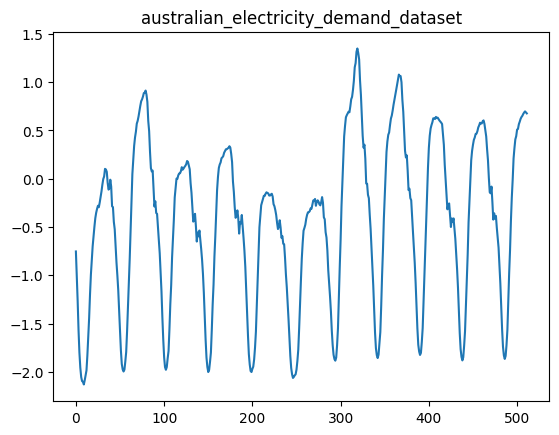

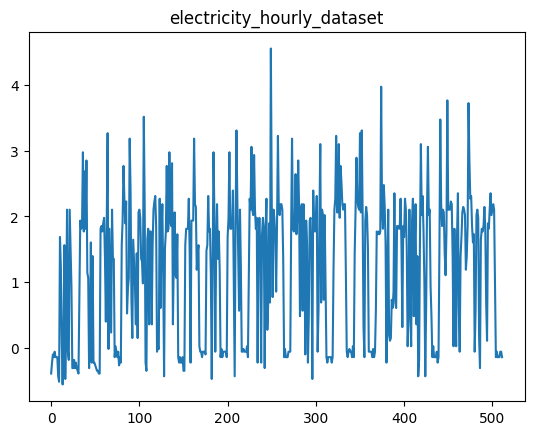

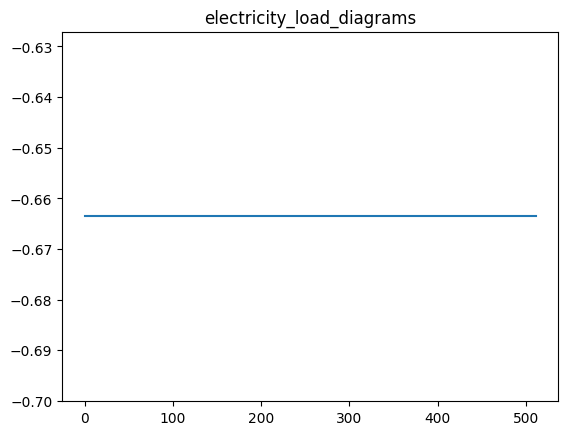

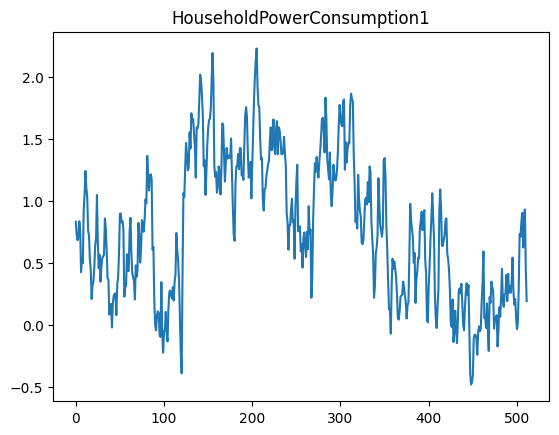

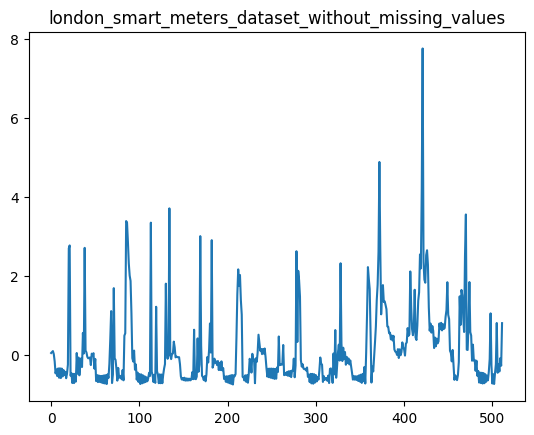

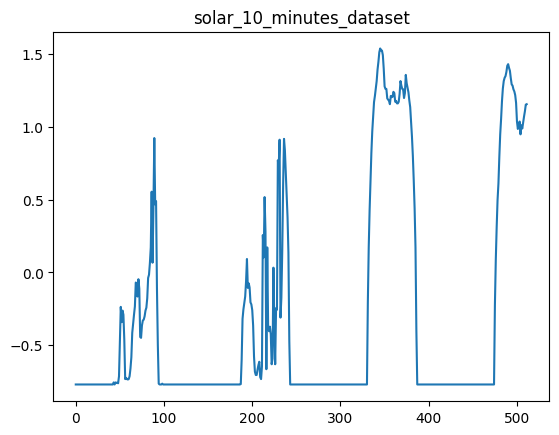

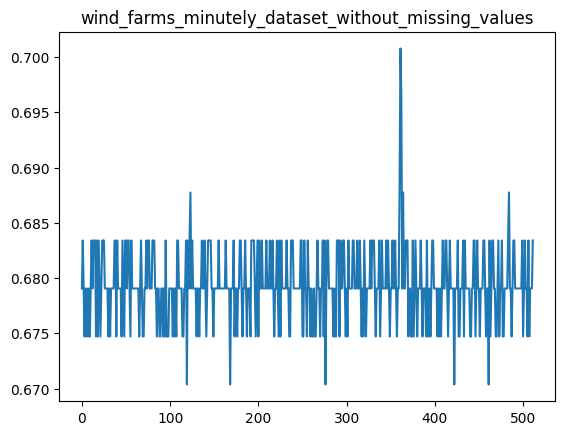

In [9]:
import matplotlib.pyplot as plt

names = original_datasets

for name in names:
    series, weights = load_series(names=[name], split="TRAIN", path="data/processed_2")
    
    plt.plot(range(len(series[0][0:512])), series[0][0:512])
    plt.title(name)
    plt.show()

#Series:  2
#points:  17420


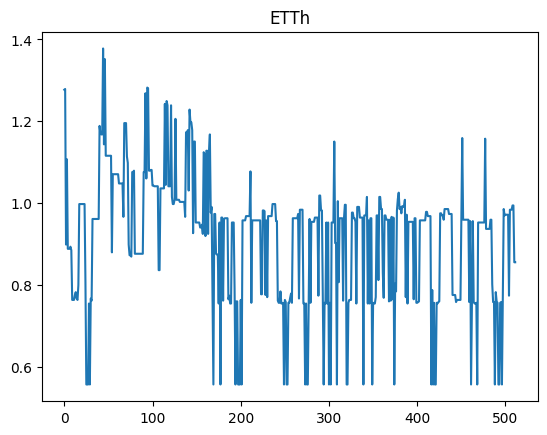

#Series:  2
#points:  69680


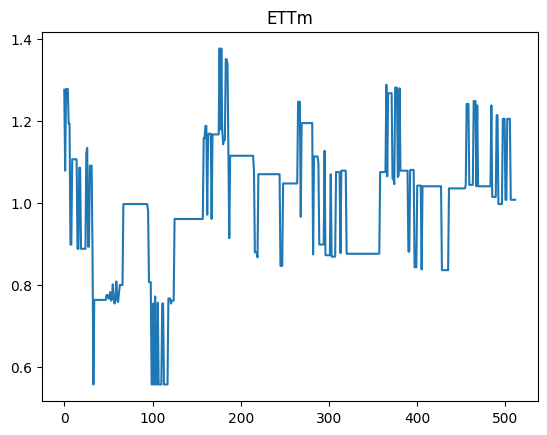

In [7]:
import matplotlib.pyplot as plt

names = ett_datasets

for name in names:
    series, weights = load_series(names=[name], split="VAL", path="data/processed_ETT")
    print("#Series: ", len(series))
    print("#points: ", len(series[0]))

    plt.plot(range(len(series[0][0:512])), series[0][0:512])
    plt.title(name)
    plt.show()

#Series:  38
#points:  87554


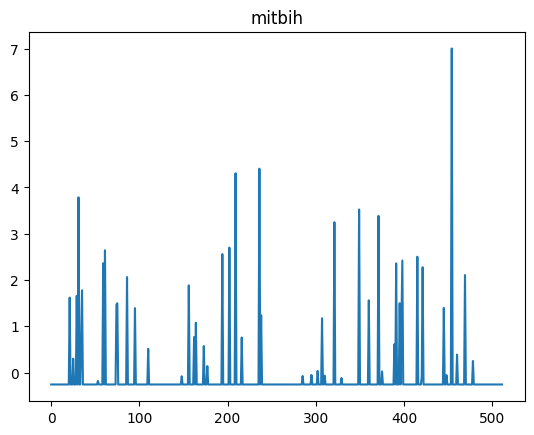

#Series:  37
#points:  10506


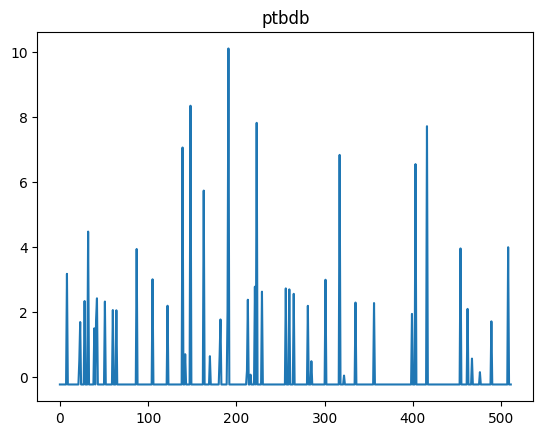

In [9]:
import matplotlib.pyplot as plt

names = ecg_datasets

for name in names:
    series, weights = load_series(names=[name], split="VAL", path="data/processed_ECG")
    print("#Series: ", len(series))
    print("#points: ", len(series[0]))
    plt.plot(range(len(series[0][0:512])), series[0][0:512])
    plt.title(name)
    plt.show()

#Series:  180
#points:  1460


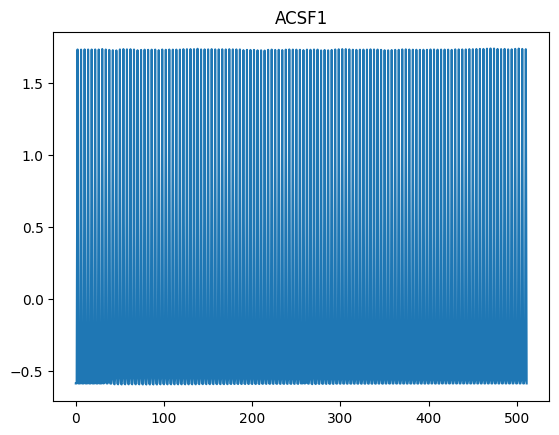

#Series:  1278
#points:  1639


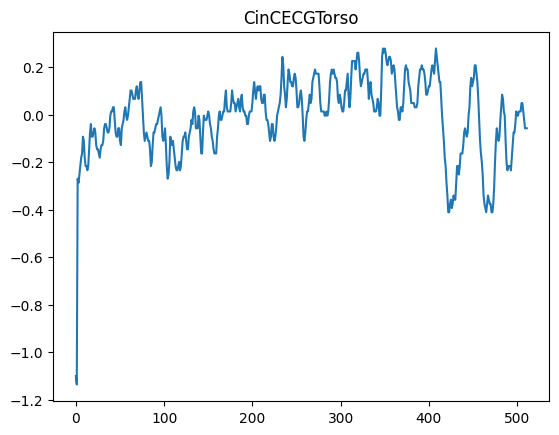

#Series:  143
#points:  2000


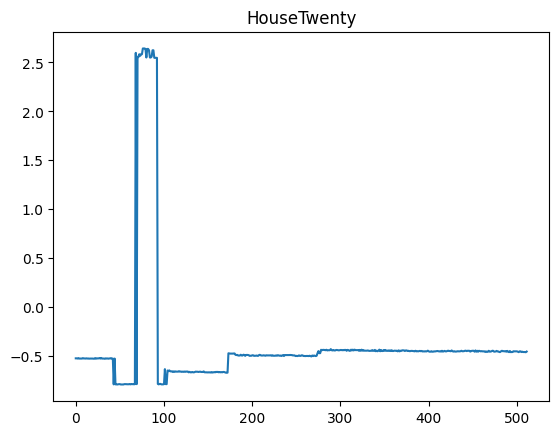

#Series:  2160
#points:  1024


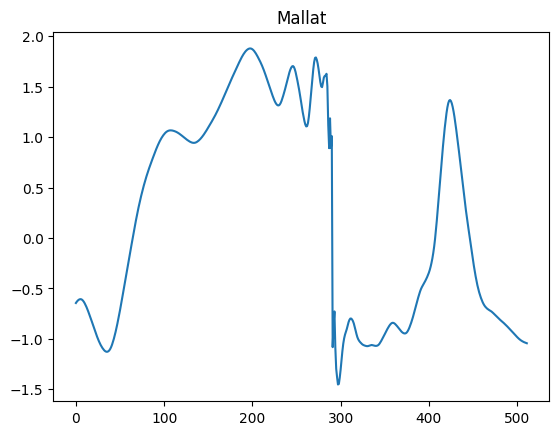

#Series:  2632
#points:  1024


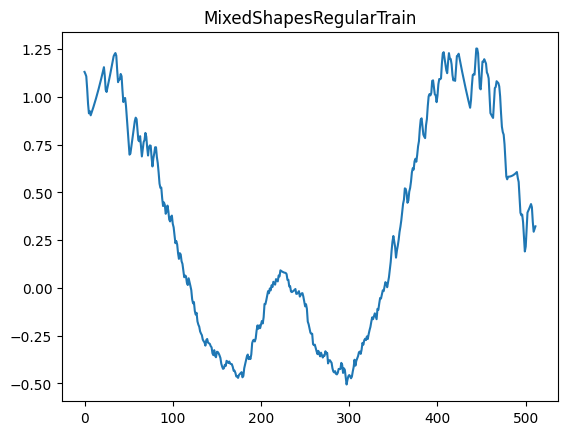

#Series:  1899
#points:  1024


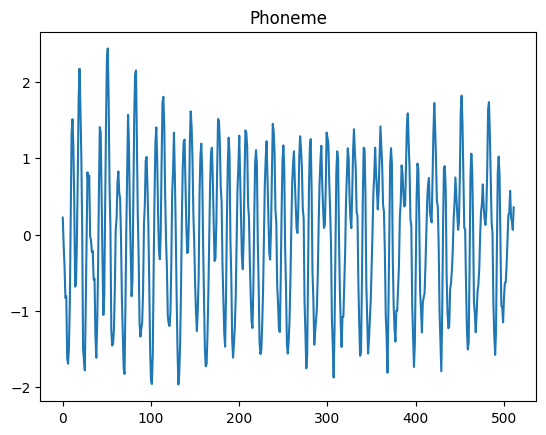

#Series:  280
#points:  2000


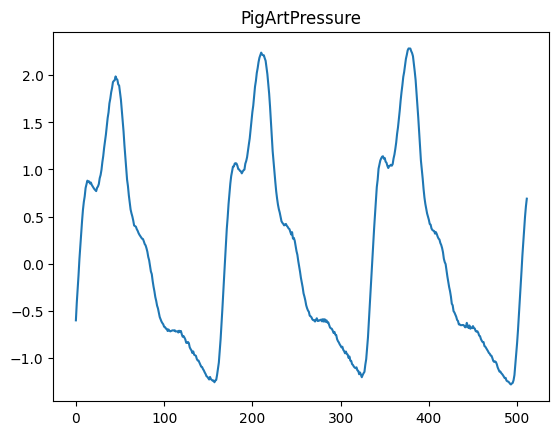

#Series:  280
#points:  2000


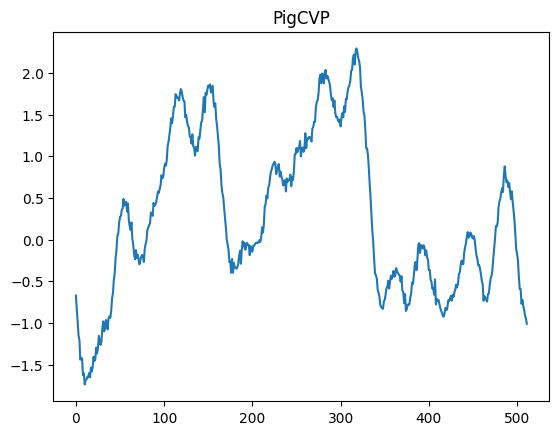

#Series:  63
#points:  2844


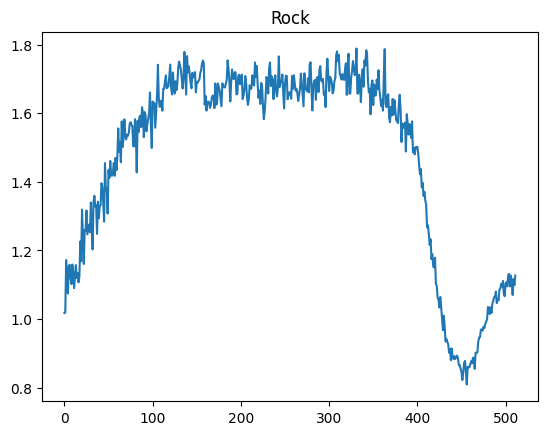

#Series:  810
#points:  1500


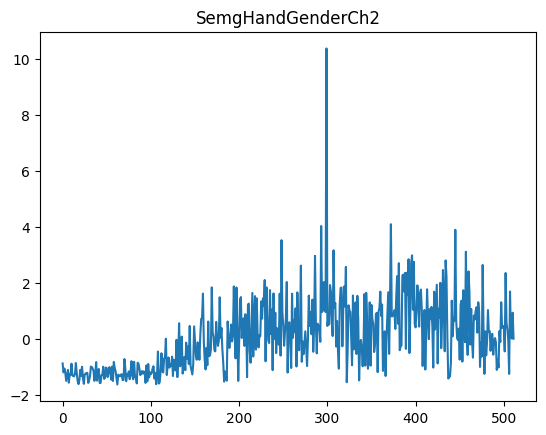

In [10]:
import matplotlib.pyplot as plt

names = ucr_tsc_datasets

for name in names:
    series, weights = load_series(names=[name], split="TRAIN", path="data/processed_UCR_TSC")
    print("#Series: ", len(series))
    print("#points: ", len(series[0]))
    plt.plot(range(len(series[0][0:512])), series[0][0:512])
    plt.title(name)
    plt.show()


In [14]:
from scipy.stats import skew, kurtosis

overall_stats = pd.DataFrame()
path = "../data/processed"
datasetnames = original_datasets + ucr_tsc_datasets + ett_datasets + ecg_datasets

for datasetname in datasetnames:
    print(datasetname)
    train_dataset, weights = load_series([datasetname], "TRAIN", path)
    val_dataset, weights = load_series([datasetname], "VAL", path)

    df = pd.DataFrame(train_dataset + val_dataset)
    stats_df = pd.DataFrame()
    stats_df["max"] = df.max(axis=1)
    stats_df["min"] = df.min(axis=1)
    stats_df["mean"] = df.mean(axis=1)
    stats_df["stddev"] = df.std(axis=1)

    gradient_df = df.diff(axis=1).abs()
    stats_df["increment_max"] = gradient_df.max(axis=1)
    stats_df["increment_min"] = gradient_df.min(axis=1)
    stats_df["increment_mean"] = gradient_df.mean(axis=1)
    stats_df["increment_stddev"] = gradient_df.std(axis=1)

    stats_df["skew"] = df.apply(lambda row: skew(row, bias=True, nan_policy='omit'), axis=1)
    stats_df["kurtosis"] = df.apply(lambda row: kurtosis(row, fisher=False, bias=True, nan_policy='omit'), axis=1)

    stats_df["datasetname"] = datasetname

    overall_stats = pd.concat([overall_stats, stats_df])

    print(len(overall_stats))

australian_electricity_demand_dataset
5
electricity_hourly_dataset
326
electricity_load_diagrams
696
HouseholdPowerConsumption1
3549
london_smart_meters_dataset_without_missing_values
9104
solar_10_minutes_dataset
9241
wind_farms_minutely_dataset_without_missing_values
9562
ACSF1
9762
CinCECGTorso
11182
HouseTwenty
11341
Mallat
13741
MixedShapesRegularTrain
16666
Phoneme
18776
PigArtPressure
19088
PigCVP
19400
Rock
19470
SemgHandGenderCh2
20370
mitbih
20744
ptbdb
21112
ETTh
21124
ETTm
21136


In [16]:
overall_and_real = pd.concat([stats_df_real, overall_stats], ignore_index=True)
overall_and_real.at[0,"datasetname"] = "real"
overall_and_real_grouped_mean = overall_and_real.groupby(['datasetname']).mean()
overall_and_real_grouped_std = overall_and_real.groupby(['datasetname']).std()

In [26]:
overall_and_real_grouped_mean


,max,min,mean,stddev,increment_max,increment_min,increment_mean,increment_stddev,skew,kurtosis
datasetname,,,,,,,,,,
ACSF1,3.301568,-0.760565,-3.172107e-10,1.000343,3.786280,4.857691e-02,1.160304,1.011874,1.472472,6.962876
CinCECGTorso,4.478628,-5.070333,1.010808e-09,1.000305,0.763537,5.353352e-06,0.028439,0.062548,-0.393856,26.560786
ETTh,3.698645,-3.655365,-8.398179e-08,1.000029,3.677098,0.000000e+00,0.212363,0.239558,-0.427089,5.644805
ETTm,3.747683,-3.876129,2.718551e-06,1.000007,3.366232,0.000000e+00,0.121285,0.154045,-0.427942,5.621293
HouseTwenty,4.396004,-0.741042,-1.664570e-08,1.000250,4.215838,0.000000e+00,0.093351,0.399919,2.153795,8.654520
HouseholdPowerConsumption1,3.646425,-2.075451,1.930000e-11,1.000349,2.208064,0.000000e+00,0.140969,0.220009,0.643361,4.544977
Mallat,2.120809,-1.312219,-9.003998e-10,1.000489,1.049070,2.862433e-05,0.031149,0.059143,0.497901,1.830795
MixedShapesRegularTrain,1.901824,-2.028852,1.476963e-09,1.000489,0.056432,4.146016e-05,0.022289,0.012931,-0.134640,2.350230
Phoneme,3.254791,-4.172433,4.608822e-10,1.000489,2.675938,2.714853e-04,0.310801,0.360721,-0.462032,6.517386


In [18]:
overall_and_real_grouped_mean.to_csv('overall_and_real_mean.csv')
overall_and_real_grouped_std.to_csv('overall_and_real_std.csv')

In [50]:
abs_diff = (overall_and_real_grouped_mean - overall_and_real_grouped_mean.loc["real"]).abs()
abs_diff.drop("real", inplace=True)

ranked = abs_diff.rank(method="min", ascending=True, na_option="bottom")

In [51]:
ranked.drop(columns=["mean", "stddev", "increment_min"], inplace=True)

In [52]:
ranked["count"] = ranked.sum(axis=1)
ranked["rank"] = ranked.sum(axis=1).rank(method="min", ascending=True, na_option="bottom")

In [53]:
ranked.sort_values(by="rank")

,max,min,increment_max,increment_mean,increment_stddev,skew,kurtosis,count,rank
datasetname,,,,,,,,,
CinCECGTorso,7.0,1.0,17.0,4.0,9.0,4.0,2.0,44.0,1.0
ETTm,11.0,3.0,11.0,11.0,2.0,2.0,10.0,50.0,2.0
ETTh,12.0,4.0,8.0,14.0,4.0,3.0,9.0,54.0,3.0
electricity_load_diagrams,9.0,10.0,9.0,10.0,1.0,8.0,12.0,59.0,4.0
australian_electricity_demand_dataset,6.0,5.0,14.0,12.0,5.0,11.0,15.0,68.0,5.0
Phoneme,15.0,2.0,12.0,16.0,15.0,1.0,8.0,69.0,6.0
electricity_hourly_dataset,10.0,6.0,10.0,15.0,12.0,7.0,13.0,73.0,7.0
HouseholdPowerConsumption1,13.0,8.0,13.0,13.0,3.0,13.0,11.0,74.0,8.0
london_smart_meters_dataset_without_missing_values,2.0,16.0,2.0,17.0,17.0,18.0,3.0,75.0,9.0
